<a href="https://colab.research.google.com/github/oshamray/Stock-optimize-portfolio/blob/master/Stock-optimize-portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
#get stock symbols fiction portfolio
assets = ['INTC','CL=F','GE']

In [ ]:
#weights to the stocks
weigts = np.array([0.33, 0.33, 0.33])

In [ ]:
#Get portfilio start date
stockStartDate = '2019-01-01'

In [ ]:
#Stocks ending date
today = datetime.today().strftime('%Y-%m-%d')
today

'2020-07-08'

In [ ]:
# Create df to store  close price
df = pd.DataFrame()

#store the data close price to the df
for stock in assets:
  df[stock] = web.DataReader(stock, data_source='yahoo', start=stockStartDate,end=today)['Adj Close']

In [ ]:
#Show df
df

,INTC,CL=F,GE
Date,,,
2019-01-02,45.452202,46.540001,7.690249
2019-01-03,42.951744,47.090000,7.699802
2019-01-04,45.587357,47.959999,7.862205
2019-01-07,45.799751,48.520000,8.349413
2019-01-08,46.089378,49.779999,8.177457
...,...,...,...
2020-07-01,58.810001,39.610001,6.740000
2020-07-02,59.130001,40.320000,6.820000
2020-07-06,59.540001,40.700001,7.000000


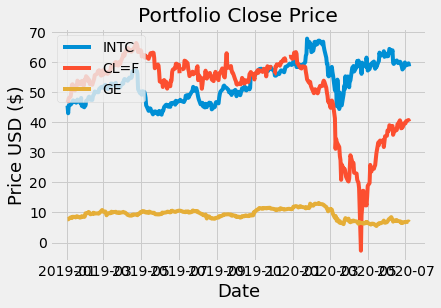

In [ ]:
#visual show the stocks
title = 'Portfolio Close Price'

#Get the stocks
my_stocks = df

#create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()


In [ ]:
#show dayly returns
returns = df.pct_change()
returns

,INTC,CL=F,GE
Date,,,
2019-01-02,NaN,NaN,NaN
2019-01-03,-0.055013,0.011818,0.001242
2019-01-04,0.061362,0.018475,0.021092
2019-01-07,0.004659,0.011676,0.061968
2019-01-08,0.006324,0.025969,-0.020595
...,...,...,...
2020-06-30,0.026772,0.000757,0.004412
2020-07-01,-0.017048,-0.001261,-0.013177
2020-07-02,0.005441,0.017925,0.011869


In [ ]:
#create covariance matrix
cov_matrix_anual = returns.cov() * 252
cov_matrix_anual

,INTC,CL=F,GE
INTC,0.191849,0.163314,0.113051
CL=F,0.163314,14.073073,0.074708
GE,0.113051,0.074708,0.310764


In [ ]:
#Calculate the portfolio variance
portfolio_variance = np.dot(weigts.T, np.dot(cov_matrix_anual, weigts))
portfolio_variance

1.663756047672242

In [ ]:
#Calculate portfolio volatility aka std
portfolio_volatility = np.sqrt(portfolio_variance)
portfolio_volatility

1.289866678254866

In [ ]:
#Calculate anual portfolio return
portfolio_Annual_Ret = np.sum(returns.mean() * weigts) * 252
portfolio_Annual_Ret

-0.8524940188080815

In [ ]:
#Show the expected annual returns, volatility (risk), and variance
percent_var = str(round(portfolio_variance, 2)*100) +'%'
percent_vols = str(round(portfolio_volatility, 2)*100) +'%'
percent_ret = str(round(portfolio_Annual_Ret, 2)*100) +'%'

print('Expected annual return: '+ percent_ret) # תשואה
print('Annual volatility/risk: '+ percent_vols)# תנודות ריסקיות
print('Annual varinace: '+ percent_var)# שונות

Expected annual return: -85.0%
Annual volatility/risk: 129.0%
Annual varinace: 166.0%


In [ ]:
pip install PyPortfolioOpt

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
#Portfolio optimization

#Clac the expectrd returns and the annual sample cov matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#optimize for max share ratio
ef = EfficientFrontier(mu, S)
weigts = ef.max_sharpe()
cleaned_weigts = ef.clean_weights()
print(cleaned_weigts)
ef.portfolio_performance(verbose = True)

OrderedDict([('INTC', 1.0), ('CL=F', 0.0), ('GE', 0.0)])
Expected annual return: 26.3%
Annual volatility: 43.8%
Sharpe Ratio: 0.56


(0.2632554915762952, 0.4380056676642371, 0.5553706482235934)

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weigts = cleaned_weigts
da = DiscreteAllocation(weigts, latest_prices, total_portfolio_value = 5000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))


Discrete allocation: {'INTC': 85.0}
Funds remaining: $26.23
